In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import matplotlib.ticker as tck
import scipy.linalg as LA

import seaborn as sns
import pandas as pd
sns.axes_style("whitegrid")

from tqdm import tqdm

import matplotlib
matplotlib.rcParams['text.usetex'] = True

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

from matplotlib.colors import Normalize

In [2]:
L = 12
U = 10.0
lamda = 1.0
delta_stag = 0.0

In [3]:
Nsites = int(L*L)

a1 = np.array([1,0])
a2 = np.array([0,1])

pmn = np.zeros([Nsites,2])

for m in range(L):
    for n in range(L):
        p = m + L*n
        pmn[p] = [m,n]

def i_to_rij(i):
    [m1,n1] = pmn[i]
    return np.multiply(a1,m1/float(L)) + np.multiply(a2,n1/float(L))


XYSarray = np.zeros([Nsites, 5]).astype(complex)

ctr = 0
for i in range(Nsites):

    uc = i_to_rij(i)

    # sq sites
    loc = uc
    Ls = 3.0
    vec = [1,1,1]#np.asarray([np.sin(2*Ls*np.pi*loc[0]), np.sin(2*Ls*np.pi*loc[1]), np.sin(2*Ls*np.pi*loc[0]) + np.sin(2*Ls*np.pi*loc[1])+1 ])
    sB = vec/LA.norm(vec)
    
    if ((pmn[i][0] +  pmn[i][1])%2 == 0):
        sB = [0,0,1]
    else:
        sB = [0,0,-1]
    
    XYSarray[ctr,:] = [loc[0], loc[1], sB[0], sB[1], sB[2]]
    

    ctr += 1

In [4]:
spin_ar = XYSarray[:,2:]
loc_ar = XYSarray[:,0:2]

# create a dot product matrx

dpmat = np.zeros([Nsites, Nsites])
rimrjx = np.zeros([Nsites, Nsites])
rimrjy = np.zeros([Nsites, Nsites])

for ii in range(len(loc_ar)):
    ri = loc_ar[ii]
    si = spin_ar[ii]
    for jj in range(len(loc_ar)):
        rj = loc_ar[jj]
        rij = ri - rj
        sj = spin_ar[jj]
        
        rimrjx[ii,jj] = rij[0]
        rimrjy[ii,jj] = rij[1]
        dpmat[ii,jj] = np.dot(si,sj)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


In [5]:
def SpinSQ(qx,qy):
    
    sqx = np.sum( np.exp(1j*(qx*loc_ar[:,0] + qy*loc_ar[:,1]))*spin_ar[:,0]   )
    sqy = np.sum( np.exp(1j*(qx*loc_ar[:,0] + qy*loc_ar[:,1]))*spin_ar[:,1]   )
    sqz = np.sum( np.exp(1j*(qx*loc_ar[:,0] + qy*loc_ar[:,1]))*spin_ar[:,2]   )
    
    return np.asarray([sqx, sqy, sqz])


In [6]:
nkpts = 100

SSFmod = np.zeros([nkpts,nkpts])
Mij = np.zeros([nkpts,nkpts])

shift = np.pi

for i in tqdm(range(nkpts)):
    
    qi = 2.0*np.pi*i/nkpts - shift
    
    for j in range(nkpts):
        
        qj = 2.0*np.pi*j/nkpts - shift
        
        spq = SpinSQ(qi,qj)
        smq = SpinSQ(-qi,-qj)
        
        Mij[i,j] = np.dot(spq, smq)/Nsites
        

100%|██████████| 100/100 [00:02<00:00, 41.63it/s]


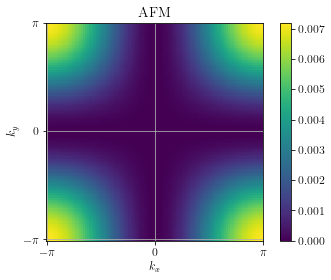

In [7]:
fig,ax = plt.subplots()
cax = ax.imshow(Mij, interpolation='nearest', origin='lower')
fig.colorbar(cax)

xaxis = np.arange(0,nkpts+1,nkpts/2)
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)

ax.set_xticklabels([r'$-\pi$',r'$0$',r'$\pi$'])
ax.set_yticklabels([r'$-\pi$',r'$0$',r'$\pi$'])

plt.grid()

plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')

ax.tick_params(axis='both')

title_text = 'AFM'

plt.title(title_text)

plt.show()


#fig.savefig('try_FM.pdf',bbox_inches='tight')

ValueError: Invalid RGBA argument: 1.0

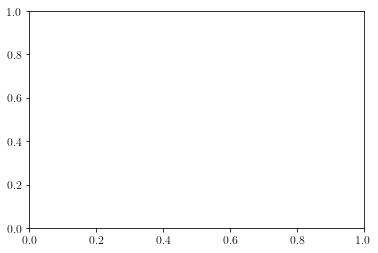

In [12]:
fig,ax = plt.subplots()


colors = np.real(spin_ar[:,2])
norm = Normalize()

#norm.autoscale(colors)
# we need to normalize our colors array to match it colormap domain
# which is [0, 1]

#cm = matplotlib.cm.winter

#sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
#sm.set_array([])

plt.quiver(np.real(loc_ar[:,0]),np.real(loc_ar[:,1]),np.real(spin_ar[:,0]),np.real(spin_ar[:,1]),color=np.real(spin_ar[:,2]), cmap='winter')


#plt.colorbar(sm)
#plt.clim(-1,1)

#plt.scatter(np.real(loc_ar[:,0]),np.real(loc_ar[:,1]),c=np.real(spin_ar[:,2]), cmap='winter')

#plt.imshow(np.real(spin_ar[:,2]).reshape([L,L]))
plt.colorbar()

plt.xlim([-0.1,1])
plt.ylim([-0.1,1])
ax.set_aspect(1)

#fig.savefig('try_FM_config.pdf',bbox_inches='tight')
